<a href="https://colab.research.google.com/github/farzooq/Love-Data-Week/blob/main/Love_Data_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [263]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import all the csv files
inventory_sets = pd.read_csv('inventory_sets.csv')
inventories = pd.read_csv('inventories.csv')
sets = pd.read_csv('sets.csv')
themes = pd.read_csv('themes.csv')
part_categories = pd.read_csv('part_categories.csv')
parts = pd.read_csv('parts.csv')
colors = pd.read_csv('colors.csv')
inventory_parts = pd.read_csv('inventory_parts.csv')

In [264]:
# Check the shapes of all datasets
print(colors.shape, '\n', part_categories.shape, '\n', parts.shape, '\n', sets.shape, '\n', themes.shape)
print(inventory_sets.shape, '\n', inventories.shape,'\n', inventory_parts.shape)

(135, 4) 
 (57, 2) 
 (25993, 3) 
 (11673, 5) 
 (614, 3)
(2846, 3) 
 (11681, 3) 
 (580251, 5)


In [265]:
# Join sets and themes dataframes
set_theme = pd.merge(sets, themes, left_on='theme_id', right_on='id', how='inner', suffixes=['_set','_theme'])
set_theme.drop(columns=['theme_id', 'id'], inplace=True)
#print(set_theme['name_theme'].unique().shape)
#print(themes['name'].unique().shape)
set_theme.head()

,set_num,name_set,year,num_parts,name_theme,parent_id
0,00-1,Weetabix Castle,1970,471,Castle,411.0
1,0011-2,Town Mini-Figures,1978,12,Supplemental,67.0
2,2181-1,Infomaniac,1997,4,Supplemental,67.0
3,300-1,T-Junction Road Plates,1978,2,Supplemental,67.0
4,301-1,Curved Road Plates,1978,2,Supplemental,67.0


In [266]:
# Join parts and parts_categories dataframes
part_category = pd.merge(parts, part_categories, left_on='part_cat_id', right_on='id', how='inner', suffixes=['_parts','_category'])
part_category.drop(columns=['part_cat_id', 'id'], inplace=True)
#print(part_category['name_category'].unique().shape)
#print(part_categories['name'].unique().shape)
part_category.head()

,part_num,name_parts,name_category
0,0687b1,Set 0687 Activity Booklet 1,Non-LEGO
1,10016414,Sticker Sheet #1 for 41055-1,Non-LEGO
2,10019stk01,Sticker for Set 10019 - (43274/4170393),Non-LEGO
3,10026stk01,Sticker for Set 10026 - (44942/4184185),Non-LEGO
4,10029stk01,Sticker for Set 10029 - (4216816),Non-LEGO


In [267]:
# Join inventory_parts, inventories, part_category, colors and set_theme dataframes
df1 = pd.merge(inventory_parts, inventories, left_on='inventory_id', right_on='id', how='inner')
df1 = pd.merge(df1, part_category, on='part_num')
df1 = pd.merge(df1, colors, left_on='color_id', right_on='id', how='inner', suffixes=['_inv', '_clr'])
df1 = pd.merge(df1, set_theme, on='set_num')

# Drop id columns
df1.drop(columns=['id_inv','color_id','id_clr', 'parent_id'], inplace=True)

In [268]:
# Get some stats on columns
print(f'is_trans can take values: {df1["is_trans"].unique()}')
print(f'is_spare can take values: {df1["is_spare"].unique()}')

is_trans can take values: ['f' 't']
is_spare can take values: ['f' 't']


In [269]:
# Make a column to map year to decade
def get_decade(year):
    return f"{str(year)[:3]}0s"

df1['decade'] = df1['year'].apply(get_decade)

# Map each theme name to a numeric value
df1['name_theme_numeric'] = pd.factorize(df1['name_theme'])[0]

In [270]:
df1.describe().round(1)

,inventory_id,quantity,version,year,num_parts,name_theme_numeric
count,580069.0,580069.0,580069.0,580069.0,580069.0,580069.0
mean,8605.3,3.3,1.0,2005.7,506.8,105.0
std,4958.5,8.2,0.0,10.9,606.3,95.8
min,1.0,1.0,1.0,1950.0,1.0,0.0
25%,4352.0,1.0,1.0,2001.0,134.0,33.0
50%,8635.0,2.0,1.0,2009.0,328.0,73.0
75%,12794.0,4.0,1.0,2014.0,665.0,155.0
max,18708.0,1440.0,5.0,2017.0,5922.0,378.0


In [271]:
# Reorder the columns in the dataframe
cols_order = ['inventory_id', 'part_num', 'name_parts', 'name_category', 'quantity', 'is_spare', 'version',
              'name', 'rgb', 'is_trans','set_num', 'name_set', 'year', 'num_parts', 'name_theme','name_theme_numeric' , 'decade']
df1 = df1[cols_order]
df1.head()

,inventory_id,part_num,name_parts,name_category,quantity,is_spare,version,name,rgb,is_trans,set_num,name_set,year,num_parts,name_theme,name_theme_numeric,decade
0,1,48379c01,Sports Promo Figure Base with Feet,Minifig Accessories,1,f,1,Dark Bluish Gray,6C6E68,f,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,4,Gravity Games,0,2000s
1,1,paddle,Sports Promo Paddle from McDonald's Sports Sets,Minifig Accessories,1,f,1,Black,05131D,f,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,4,Gravity Games,0,2000s
2,1,48395,Sports Promo Snowboard from McDonald's Sports ...,Minifig Accessories,1,f,1,Light Gray,9BA19D,f,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,4,Gravity Games,0,2000s
3,1,mcsport6,Sports Promo Figure Head Torso Assembly McDona...,Minifigs,1,f,1,Orange,FE8A18,f,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,4,Gravity Games,0,2000s
4,15767,48379c01,Sports Promo Figure Base with Feet,Minifig Accessories,1,f,1,Dark Bluish Gray,6C6E68,f,7917-1,McDonald's Sports Set Number 3 - Blue Basketba...,2004,4,Basketball,1,2000s


In [272]:
# Drop duplicate set names to count each set one time
df2 = df1.drop_duplicates(subset=['name_set'])
print(df1.shape)
print(df2.shape)

(580069, 17)
(9457, 17)


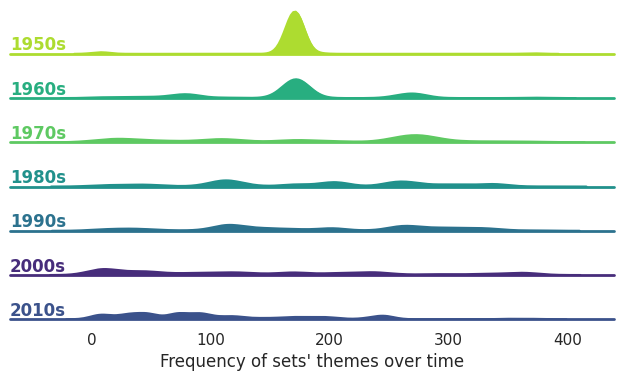

In [273]:
decade_order = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

# Initialize the FacetGrid object
g = sns.FacetGrid(df2, row='decade', hue='decade', aspect=12, height=0.6, palette='viridis', row_order=decade_order)

# Draw the densities
g.map(sns.kdeplot, 'name_theme_numeric', fill=True, alpha=1, bw_adjust=.5)
g.map(sns.kdeplot, 'name_theme_numeric', bw_adjust=.5)

# Drawing the reference line and adjusting color according to hue above by setting color=None
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define a function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color=color, ha='left', va='center', transform=ax.transAxes)

g.map(label, 'name_theme_numeric')

# Set the space between adjacent rows
g.figure.subplots_adjust(hspace=0)

# Remove axes details to remove clutter
g.set_titles('')
g.set(yticks=[], ylabel='', xlabel="Frequency of sets' themes over time")
g.despine(bottom=True, left=True)
plt.show()

The above visualization shows that in 1950s, themes of codes 150 to 200 were introduced which was also the case for 1960s but in 1970s through 1990s themes of codes around 100 and 300 started to come into the market while in 2000s and after, the theme sets of codes below 100 were offered.
The mapping of theme codes to its name is provided in the below cell (df3).  

In [288]:
df3 = df1[['name_theme', 'name_theme_numeric']].drop_duplicates(subset='name_theme').reset_index(drop=True)
df3

,name_theme,name_theme_numeric
0,Gravity Games,0
1,Basketball,1
2,Star Wars Episode 4/5/6,2
3,Space Police III,3
4,Police,4
...,...,...
374,Soft Bricks,374
375,Scala,375
376,Key Chain,376
377,4 Juniors,377
